In [2]:
from benchmark import run_benchmark
from benchmark import print_results
from splitting_methods import *
from unit_preference_methods import *

In [3]:
results = run_benchmark(100, 3, 6, 0.5, 5, 1,
                        [random_unit_choice],
                        [random_choice, two_clause_choice, jeroslow_wang_literal_choice])

In [56]:
print_results(results)

----RESULTS----
Ratio: 3.0
   Unit Pref: random_unit_choice, Splitting: random_choice:
      (0.05462195300060557, 153, True)
   Unit Pref: random_unit_choice, Splitting: two_clause_choice:
      (0.030360923003172502, 123, True)
   Unit Pref: random_unit_choice, Splitting: jeroslow_wang_literal_choice:
      (0.05145778699807124, 123, True)
Ratio: 3.5
   Unit Pref: random_unit_choice, Splitting: random_choice:
      ('TIMEOUT', -1, False)
   Unit Pref: random_unit_choice, Splitting: two_clause_choice:
      (0.06640226500167046, 267, True)
   Unit Pref: random_unit_choice, Splitting: jeroslow_wang_literal_choice:
      (0.278234794997843, 763, True)
Ratio: 4.0
   Unit Pref: random_unit_choice, Splitting: random_choice:
      ('TIMEOUT', -1, False)
   Unit Pref: random_unit_choice, Splitting: two_clause_choice:
      (0.43507160599983763, 1423, True)
   Unit Pref: random_unit_choice, Splitting: jeroslow_wang_literal_choice:
      (2.832448911998654, 8289, True)
Ratio: 4.5
   Unit Pref:

In [71]:
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import numpy as np

In [72]:
ln = np.arange(3,6.5,0.5)
res = results


In [73]:
rand_exps = []
two_clause_exps = []
jw_exps = []

for ratio in res:
    for up in res[ratio]:
        rand_exps.append(res[ratio][up]["random_choice"])
        two_clause_exps.append(res[ratio][up]["two_clause_choice"])
        jw_exps.append(res[ratio][up]["jeroslow_wang_literal_choice"])


rand_patch = mpatches.Patch(color='red', label='Random Choice')
two_clause_patch = mpatches.Patch(color='blue', label='Two-Clause')
jw_patch = mpatches.Patch(color='green', label='Jeroslow Wang')

patches = [rand_patch, two_clause_patch, jw_patch]


In [59]:
def compute_median_time(exps):
    times = []
    for exp in exps:
        if exp[0] != 'TIMEOUT':
            times.append(exp[0])
    return np.median(times)

/usr/lib/python3/dist-packages/numpy/core/fromnumeric.py:3256: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/usr/lib/python3/dist-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


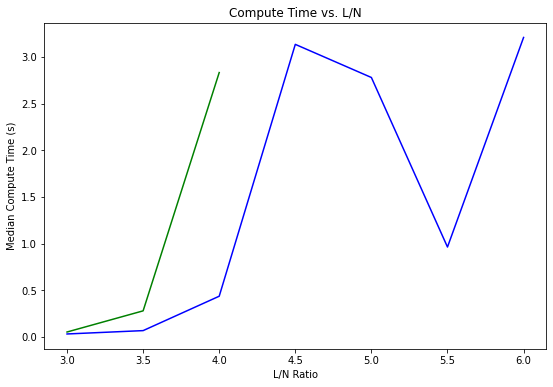

In [60]:
# Median Compute Time vs. L/N

rand_times = []
two_clause_times = []
jw_times = []

for i in range(len(ln)):
    rand_times.append(compute_median_time(rand_exps[i]))
    two_clause_times.append(compute_median_time(two_clause_exps[i]))
    jw_times.append(compute_median_time(jw_exps[i]))

plt.figure(figsize=(12,9))
plt.legend(handles=patches)
plt.plot(ln, rand_times, 'r', ln, two_clause_times, 'b', ln, jw_times, 'g')
plt.title("Compute Time vs. L/N")
plt.ylabel("Median Compute Time (s)")
plt.xlabel("L/N Ratio")
plt.show()

In [61]:
def compute_num_calls(exps):
    calls = []
    for exp in exps:
        if exp[0] != 'TIMEOUT':
            calls.append(exp[1])
    return np.median(calls)

/usr/lib/python3/dist-packages/numpy/core/fromnumeric.py:3256: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/usr/lib/python3/dist-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


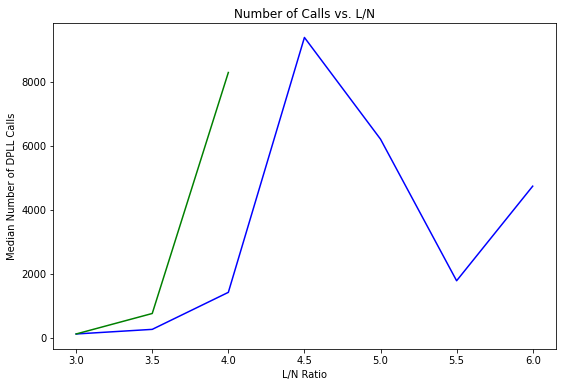

In [62]:
# Num Calls vs. L/N

rand_calls = []
two_clause_calls = []
jw_calls = []

for i in range(len(ln)):
    rand_calls.append(compute_num_calls(rand_exps[i]))
    two_clause_calls.append(compute_num_calls(two_clause_exps[i]))
    jw_calls.append(compute_num_calls(jw_exps[i]))
    
plt.figure(figsize=(12,9))
plt.legend(handles=patches)
plt.plot(ln, rand_calls, 'r', ln, two_clause_calls, 'b', ln, jw_calls, 'g')
plt.title("Number of Calls vs. L/N")
plt.ylabel("Median Number of DPLL Calls")
plt.xlabel("L/N Ratio")
plt.show()

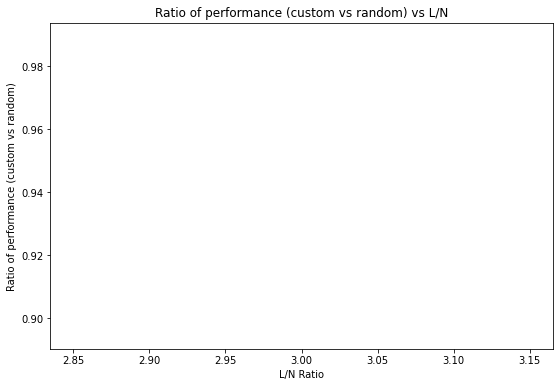

In [63]:
# Ratio of performance (custom vs random) vs L/N

perf_custom_random = []

for i in range(len(rand_times)):
    perf_custom_random.append(jw_times[i]/rand_times[i])

plt.figure(figsize=(9,6))
plt.plot(ln, perf_custom_random)
plt.title("Ratio of performance (custom vs random) vs L/N")
plt.ylabel("Ratio of performance (custom vs random)")
plt.xlabel("L/N Ratio")
plt.show()

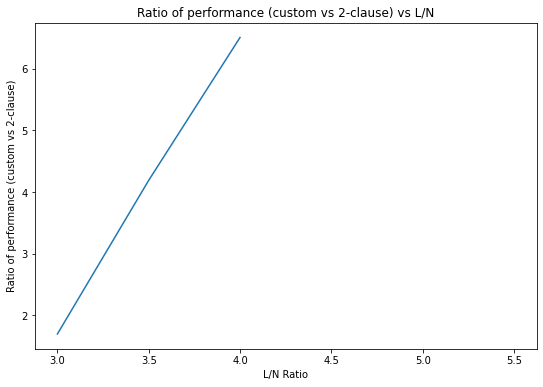

In [64]:
# Ratio of performance (custom vs 2-clause) vs L/N

perf_custom_two_clause = []

for i in range(len(two_clause_times)):
    perf_custom_two_clause.append(jw_times[i]/two_clause_times[i])

plt.figure(figsize=(9,6))
plt.plot(ln, perf_custom_two_clause)
plt.title("Ratio of performance (custom vs 2-clause) vs L/N")
plt.ylabel("Ratio of performance (custom vs 2-clause)")
plt.xlabel("L/N Ratio")
plt.show()

In [65]:
def compute_sat_prob(exps):
    num_sat = 0
    for exp in exps:
        if exp[2]:
            num_sat += 1
    return num_sat/float(len(exps))

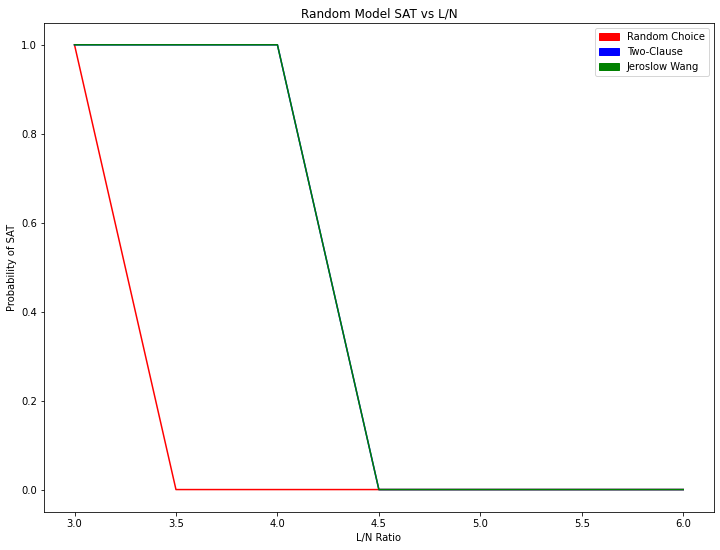

In [79]:
# Probability of sat vs L/N

rand_probs = []
two_clause_probs = []
jw_probs = []

for i in range(len(ln)):
    rand_probs.append(compute_sat_prob(rand_exps[i]))
    two_clause_probs.append(compute_sat_prob(two_clause_exps[i]))
    jw_probs.append(compute_sat_prob(jw_exps[i]))


# for ratio in res:
#     for up in res[ratio]:
#         cur_prob = []
#         for split in res[ratio][up]:
#             cur_prob.append(compute_sat_prob(res[ratio][up][split]))        
#         sat_probs.append(float(sum(cur_prob)) / len(cur_prob))


plt.figure(figsize=(12,9))
plt.legend(handles=patches)
plt.plot(ln, rand_probs, 'r', ln, two_clause_probs, 'b', ln, jw_probs, 'g')
plt.title("Random Model SAT vs L/N")
plt.ylabel("Probability of SAT")
plt.xlabel("L/N Ratio")
plt.show()